In [1]:
# 建立模型資料
# https://scikit-learn.org/stable/datasets/index.html
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns=iris["feature_names"])


df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# KMeans演算法(K個圓心)

## 分群

已知K：iris
不知K：穿衣風格...等

今天用K已知
迭代(Try & Error)

1.隨便給圓心
2.計算所有點到K圓心的距離
3.調整圓心
4.重複到找到群體資料的中心


In [2]:
# 分群

from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

# 執行結果
# k-means++ 盡量把三個圓心離遠一點
# max_iter=300 次數
# tol=0.0001 點的距離差值


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
# 查看分群結果，存起來

df["ans"] = cluster.predict(iris["data"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# 看圓心(是個虛擬的點)    cluster(聚集、反正就是一團的意思) 
# 白話文：一個標準的"鳶尾花"應該是什麼樣子

cluster.cluster_centers_
# 如果是"穿衣風格"就可以提供一個分類標準值

# 所以不要去對答案，分群本來就不應該有答案
# 不知道K圓心的下次再說 2020/04/07

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
# 試過所有的"K"
# 親疏程度

from sklearn.metrics import silhouette_score
# 分成2~5群去試試看
for k in range(2, 6):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
# 該怎麼用
# sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None, **kwds)
    s = silhouette_score(iris["data"], cluster.labels_)
    print(k, ":", s)
    
# 可以看到分成2群最好



2 : 0.681046169211746
3 : 0.5528190123564091
4 : 0.4980505049972867
5 : 0.4887488870931048


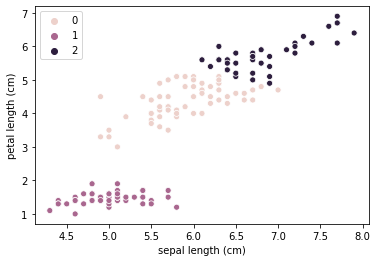

In [7]:
# 來畫分群圖
# https://seaborn.pydata.org/api.html
# 畫scatterplot

import matplotlib.pyplot as plt
import seaborn as sns

# "%"表示jupyter特殊指令
# %matplotlib具體作用是當你調用matplotlib.pyplot的繪圖函數plot()進行繪圖的時候，
# 或者生成一個figure畫布的時候，可以直接在你的python console裏面生成圖像
%matplotlib inline

cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])
sns.scatterplot(x=df["sepal length (cm)"],
                y=df["petal length (cm)"],
                hue=cluster.labels_)

# 由圖可以知道，"silhouette_score"分成兩團的結果最好其實是合理的
